In [1]:
import pvdeg
from global_land_mask import globe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import dask.array as da

DataLibrary not found in {DATA_LIBRARY} or {PVDEG_DIR.parent}.


In [2]:
lon_UK = np.arange(-10.5, 1.76, 0.1)
lat_UK = np.arange(49.95, 60, 0.1)
lon_grid_UK, lat_grid_UK = np.meshgrid(lon_UK, lat_UK)
land_UK = globe.is_land(lat_grid_UK, lon_grid_UK)

lon_land_UK = lon_grid_UK[land_UK]
lat_land_UK = lat_grid_UK[land_UK]

lon_Scan = np.arange(-10.5, 31.6, 0.3)
lat_Scan = np.arange(60, 71.2, 0.3)
lon_grid_Scan, lat_grid_Scan = np.meshgrid(lon_Scan, lat_Scan)
land_Scan = globe.is_land(lat_grid_Scan, lon_grid_Scan)

lon_land_Scan = lon_grid_Scan[land_Scan]
lat_land_Scan = lat_grid_Scan[land_Scan]

In [3]:
lon_land_Scan.size

2138

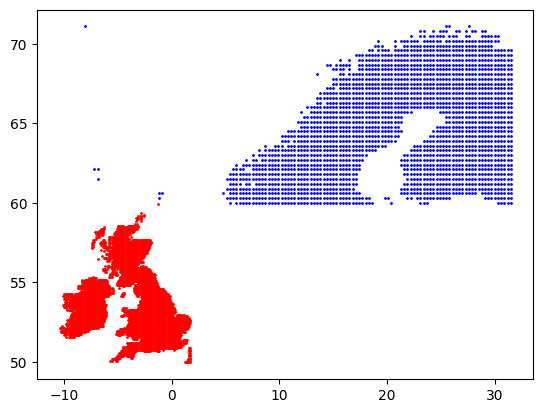

In [4]:
plt.scatter(lon_land_UK, lat_land_UK, c="r", s=1)
plt.scatter(lon_land_Scan, lat_land_Scan, c="b", s=1)

In [4]:
gids = len(lon_land_UK)

weather_db = "PVGIS"
meta_pvgis = pd.DataFrame(columns=["latitude", "longitude", "altitude"])

shapes = {
    "temp_air": ("gid", "time"),
    "relative_humidity": ("gid", "time"),
    "ghi": ("gid", "time"),
    "dni": ("gid", "time"),
    "dhi": ("gid", "time"),
    "IR(h)": ("gid", "time"),
    "wind_speed": ("gid", "time"),
    "wind_direction": ("gid", "time"),
    "pressure": ("gid", "time"),
}
attrs = {}
global_attrs = {}

dims = {"gid", "time"}
dims_size = {"time": 8760, "gid": gids}

weather_ds = xr.Dataset(
    data_vars={
        var: (dim, da.empty([dims_size[d] for d in dim]), attrs.get(var))
        for var, dim in shapes.items()
    },
    coords={
        "time": pd.date_range("2022-01-01", freq="h", periods=365 * 24),
        "gid": np.linspace(0, gids - 1, gids, dtype=int),
    },
    attrs=global_attrs,
)  # .chunk({dim: ds_gids.chunks[dim] for dim in dims})

gids_failed = []

for i in range(0, gids):
    print(i)
    lon = lon_land_UK[i]
    lat = lat_land_UK[i]

    weather_id = (lat, lon)
    try:
        weather_df, meta = pvdeg.weather.get(weather_db, weather_id)
    except Exception as e:
        gids_failed.append(i)
        print(e)

    meta_pvgis.loc[i] = meta.values()
    weather_df.index.rename("time", inplace=True)
    weather_ds[dict(gid=i)] = weather_df.to_xarray().drop_vars("time")

    if i % 100 == 0 or i == gids - 1:
        weather_ds.to_netcdf("data/weather_ds_uk_{}.nc".format(i))
        meta_pvgis.to_csv("data/meta_pvgis_uk_{}.csv".format(i))
        pd.DataFrame({"gids_failed": gids_failed}).to_csv("data/gids_failed_scan.csv")

0
1
2
3
4
5
6
Location over the sea. Please, select another location
7
Location over the sea. Please, select another location
8
9
10
('Connection broken: IncompleteRead(125658 bytes read, 1146404 more expected)', IncompleteRead(125658 bytes read, 1146404 more expected))
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
Location over the sea. Please, select another location
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
Location over the sea. Please, select another location
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
Location over the sea. Please, select another location
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
HTTPSConnectionPool(host='re.jrc.ec.europa.eu', port=443): Read timed out.
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
15

In [9]:
gids = len(lon_land_Scan)

weather_db = "PVGIS"
meta_pvgis = pd.DataFrame(columns=["latitude", "longitude", "altitude"])

shapes = {
    "temp_air": ("gid", "time"),
    "relative_humidity": ("gid", "time"),
    "ghi": ("gid", "time"),
    "dni": ("gid", "time"),
    "dhi": ("gid", "time"),
    "IR(h)": ("gid", "time"),
    "wind_speed": ("gid", "time"),
    "wind_direction": ("gid", "time"),
    "pressure": ("gid", "time"),
}
attrs = {}
global_attrs = {}

dims = {"gid", "time"}
dims_size = {"time": 8760, "gid": gids}

weather_ds = xr.Dataset(
    data_vars={
        var: (dim, da.empty([dims_size[d] for d in dim]), attrs.get(var))
        for var, dim in shapes.items()
    },
    coords={
        "time": pd.date_range("2022-01-01", freq="h", periods=365 * 24),
        "gid": np.linspace(0, gids - 1, gids, dtype=int),
    },
    attrs=global_attrs,
)  # .chunk({dim: ds_gids.chunks[dim] for dim in dims})

gids_failed = []

for i in range(1500, 1601):
    print(i)
    lon = lon_land_Scan[i]
    lat = lat_land_Scan[i]

    weather_id = (lat, lon)
    try:
        weather_df, meta = pvdeg.weather.get(weather_db, weather_id)
    except Exception as e:
        gids_failed.append(i)
        print(e)

    meta_pvgis.loc[i] = meta.values()
    weather_df.index.rename("time", inplace=True)
    weather_ds[dict(gid=i)] = weather_df.to_xarray().drop_vars("time")

    if i % 100 == 0 or i == gids - 1:
        weather_ds.to_netcdf("data/weather_ds_scan_coarse_1500_1600{}.nc".format(i))
        meta_pvgis.to_csv("data/meta_pvgis_scan_coarse_1500_1600{}.csv".format(i))
        pd.DataFrame({"gids_failed": gids_failed}).to_csv(
            "data/gids_failed_coarse_scan_1500_1600.csv"
        )

1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599


In [11]:
weather_ds.to_netcdf("data/weather_ds_scan_coarse_1500_1600{}.nc".format(i))
meta_pvgis.to_csv("data/meta_pvgis_scan_coarse_1500_1600{}.csv".format(i))
pd.DataFrame({"gids_failed": gids_failed}).to_csv(
    "data/gids_failed_coarse_scan_1500_1600.csv"
)

In [8]:
xr.open_dataset("./data/weather_ds_uk_4300.nc")

<xarray.Dataset>
Dimensions:            (gid: 4304, time: 8760)
Coordinates:
  * time               (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
  * gid                (gid) int32 0 1 2 3 4 5 ... 4298 4299 4300 4301 4302 4303
Data variables:
    temp_air           (gid, time) float64 ...
    relative_humidity  (gid, time) float64 ...
    ghi                (gid, time) float64 ...
    dni                (gid, time) float64 ...
    dhi                (gid, time) float64 ...
    IR(h)              (gid, time) float64 ...
    wind_speed         (gid, time) float64 ...
    wind_direction     (gid, time) float64 ...
    pressure           (gid, time) float64 ...